## Import Required Libraries

In [123]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout

## Import the data 

In [131]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df = pd.concat([df_test,df_train])

## EDA

In [125]:
df.corr()

,Open,High,Low
Open,1.000000,0.999700,0.999517
High,0.999700,1.000000,0.999495
Low,0.999517,0.999495,1.000000


### Getting the Overview of the data

In [126]:
df.describe()

,Open,High,Low
count,1278.000000,1278.000000,1278.000000
mean,537.994906,542.168897,533.278803
std,154.508365,155.582501,153.174011
min,279.120000,281.210000,277.220000
25%,406.037500,408.230000,403.335000
50%,538.395000,542.330000,534.355000
75%,668.862500,677.705000,662.190000
max,837.810000,841.950000,827.010000


### Columns Info

In [127]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

**Insight:** All columns are in object type

### Shape of the table

In [128]:
df.shape

(1278, 6)

**Insights :** Total 1278 rows and 6 columns

### Checking Missing Values

In [120]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Insights:** No Missing values

In [121]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [130]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


### checking for duplicated Value

In [72]:
df.duplicated().sum()

0

In [73]:
df    = df.loc[:,["Open"]].values
train_data = df[:len(df)-50] 
test_data = df[len(train):] 

In [75]:
train_data

array([[778.81],
       [788.36],
       [786.08],
       ...,
       [779.8 ],
       [787.85],
       [798.24]])

In [76]:
test_data

array([[803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33],
       [782.75]])

In [79]:
# reshape of the data
train_data = train_data.reshape(train.shape[0],1)

In [80]:
train_data

array([[778.81],
       [788.36],
       [786.08],
       ...,
       [779.8 ],
       [787.85],
       [798.24]])

In [81]:
train_data.shape

(1228, 1)

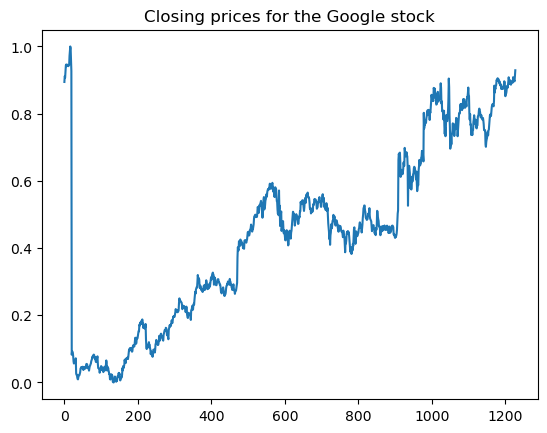

In [132]:
plt.plot(train_data)
plt.title("Closing prices for the Google stock");

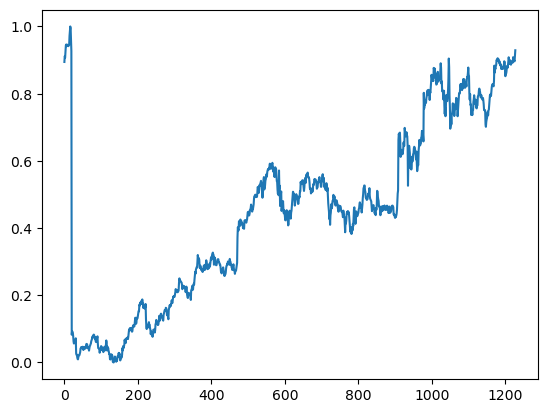

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) 
train_scaled = scaler.fit_transform(train_data)
plt.plot(train_scaled)
plt.show()

In [133]:
# We add first 50 location to "X_train" and we 51. location to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

## RNN Model

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first RNN layer and Dropout  for regularization

In [ ]:
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding the second RNN layer and Dropout  for regularization.

In [ ]:
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

### Adding the third RNN layer and Dropout  for regularization.

In [ ]:
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

### Adding the Fourth RNN layer and Dropout  for regularization.

In [ ]:
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compile and add optimizer

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set with epoch 100 and batch size 32

In [20]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 3s 26ms/step - loss: 0.4220
Epoch 2/100
37/37 [==============================] - 1s 26ms/step - loss: 0.2517
Epoch 3/100
37/37 [==============================] - 1s 28ms/step - loss: 0.1915
Epoch 4/100
37/37 [==============================] - 1s 28ms/step - loss: 0.1477
Epoch 5/100
37/37 [==============================] - 1s 26ms/step - loss: 0.1058
Epoch 6/100
37/37 [==============================] - 1s 27ms/step - loss: 0.0830
Epoch 7/100
37/37 [==============================] - 1s 35ms/step - loss: 0.0727
Epoch 8/100
37/37 [==============================] - 2s 54ms/step - loss: 0.0554
Epoch 9/100
37/37 [==============================] - 2s 51ms/step - loss: 0.0549
Epoch 10/100
37/37 [==============================] - 1s 25ms/step - loss: 0.0466
Epoch 11/100
37/37 [==============================] - 1s 40ms/step - loss: 0.0374
Epoch 12/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0346
Epoch 13/100
37/37 [=====

### Testing The Result

In [95]:
#Transform the data
inputs = df[len(df) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

In [96]:
X_test = []
Y_test =[]
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
ytest=[]
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Predict the output

In [134]:
predicted_data_train = regressor.predict(X_train)
predicted_data = regressor.predict(X_test)
train_predict=scaler.inverse_transform(predicted_data_train)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 [==============================] - 0s 7ms/step


In [136]:
print("Train RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
#print("Test RMSE: ", math.sqrt(mean_squared_error(y_train,predicted_data)))

Train RMSE:  543.4814527203918


### Visualization :Real vs predicted with RNN

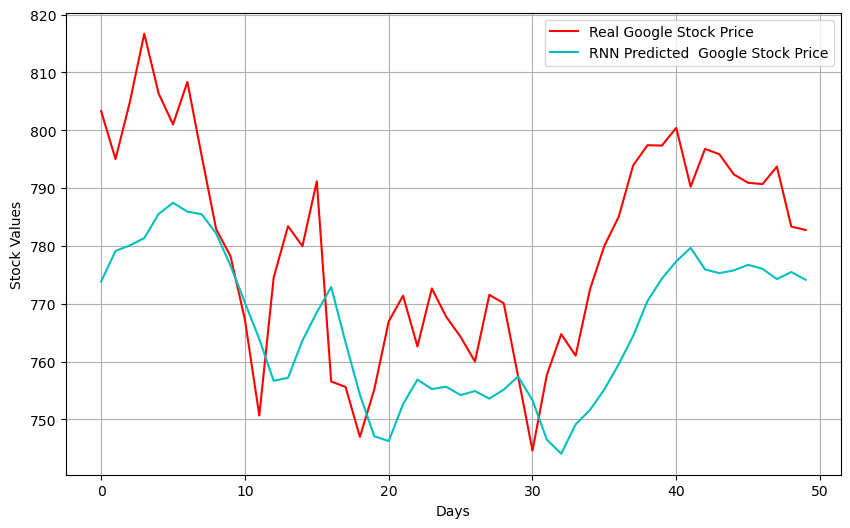

In [87]:
plt.figure(figsize=(10,6), facecolor='w', edgecolor='r')
plt.plot(test,color="red",label="Real Google Stock Price")
plt.plot(predicted_data,color="c",label="RNN Predicted  Google Stock Price")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Values")
plt.grid(True)
plt.show()

## LSTM MODULE

In [54]:
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='Adam')
model.fit(X_train,y_train,epochs=50, batch_size=1)

Epoch 1/50
1178/1178 [==============================] - 7s 5ms/step - loss: 0.0047
Epoch 2/50
1178/1178 [==============================] - 8s 7ms/step - loss: 5.6143e-04
Epoch 3/50
1178/1178 [==============================] - 14s 12ms/step - loss: 5.2748e-04
Epoch 4/50
1178/1178 [==============================] - 13s 11ms/step - loss: 4.9288e-04
Epoch 5/50
1178/1178 [==============================] - 9s 8ms/step - loss: 4.8873e-04
Epoch 6/50
1178/1178 [==============================] - 9s 7ms/step - loss: 4.4706e-04
Epoch 7/50
1178/1178 [==============================] - 9s 7ms/step - loss: 4.2326e-04
Epoch 8/50
1178/1178 [==============================] - 9s 7ms/step - loss: 4.1257e-04
Epoch 9/50
1178/1178 [==============================] - 8s 7ms/step - loss: 3.8871e-04
Epoch 10/50
1178/1178 [==============================] - 9s 8ms/step - loss: 3.8533e-04
Epoch 11/50
1178/1178 [==============================] - 8s 7ms/step - loss: 3.8013e-04
Epoch 12/50
1178/1178 [==================

In [56]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

2/2 [==============================] - 0s 5ms/step


### Visualization :Real vs predicted with RNN

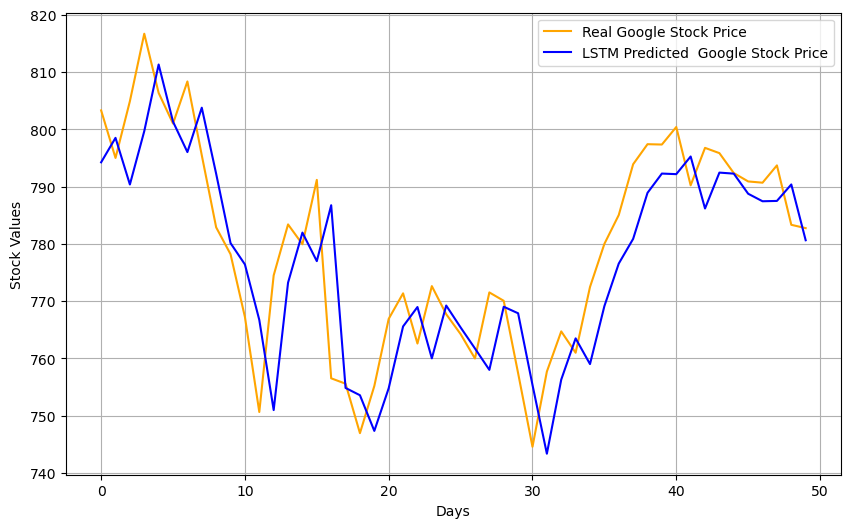

In [86]:
plt.figure(figsize=(10,6), facecolor='w', edgecolor='g')
plt.plot(test,color="orange",label="Real Google Stock Price")
plt.plot(predicted_data2,color="blue",label="LSTM Predicted  Google Stock Price")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Values")
plt.grid(True)
plt.show()

### Visualization :Real vs predicted with RNN vs predicted with LSTM

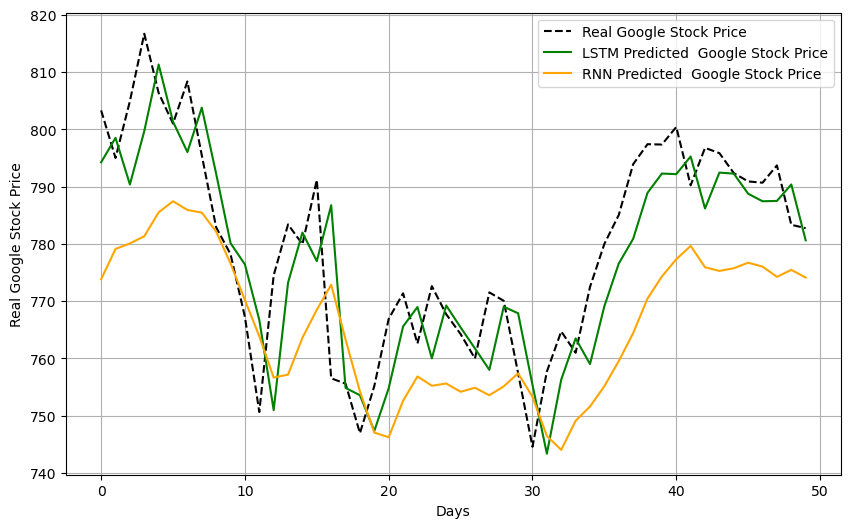

In [88]:
plt.figure(figsize=(10,6), facecolor='w', edgecolor='k')
plt.plot(test,color="black", linestyle='dashed',label="Real Google Stock Price")
plt.plot(predicted_data2,color="green", label="LSTM Predicted  Google Stock Price")
plt.plot(predicted_data,color="orange",label="RNN Predicted  Google Stock Price") # ben ekledim
plt.legend()
plt.xlabel("Days")
plt.ylabel("Real Google Stock Price")
plt.grid(True)
plt.show()